In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
Video_FILE = "count.mp4"


## Frame Extraction

In [2]:
def get_frames(filename):
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        rete,frame=video.read()
        if rete:
            yield frame
        else:
            break
        video.release()
        yield None

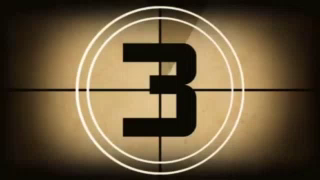

In [3]:
from google.colab.patches import cv2_imshow

for f in get_frames(Video_FILE):
    if f is None:
        break
    cv2_imshow(f)
    if cv2.waitKey(10) == 40:
        break
cv2.destroyAllWindows()

In [4]:
def get_frame(filename,index):
    counter=0
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        rete,frame=video.read()
        if rete:
            if counter==index:
                return frame
            counter +=1
        else:
            break
    video.release()
    return None

In [5]:
frame = get_frame(Video_FILE,10)
print('shape is', frame.shape)
print('pixel at (60,21)',frame[60,21,:])
print('pixel at (120,10)',frame[120,10,:])

shape is (180, 320, 3)
pixel at (60,21) [ 4 12 21]
pixel at (120,10) [ 3  8 14]


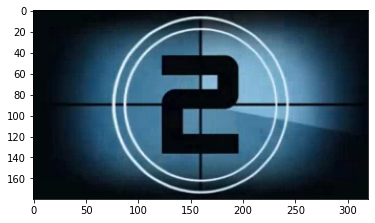

In [6]:
plt.imshow(frame)

## BGR2RGB

pixel at (120,10) [14  8  3]


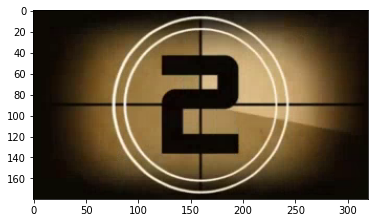

In [7]:
fix_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print('pixel at (120,10)',fix_frame[120,10,:])
plt.imshow(fix_frame)

## Brightness Change

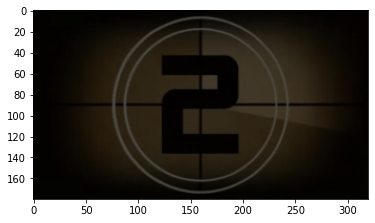

In [8]:
adjust_brightness=0.3*fix_frame
adjust_brightness=adjust_brightness.astype(np.uint8)
plt.imshow(adjust_brightness)

## Edge Detection

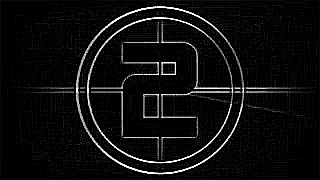

In [10]:
from PIL import Image, ImageFilter

im = Image.fromarray(fix_frame)

image2 = im.convert("L")
 
image2 = image2.filter(ImageFilter.FIND_EDGES)

image2

## GrayScale conversion

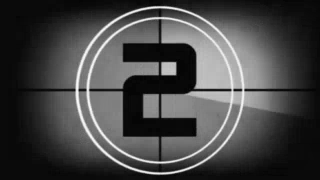

In [11]:
from PIL import ImageOps

gray_image = ImageOps.grayscale(im)
gray_image

In [13]:
# import cv2
# from google.colab.patches import cv2_imshow

# # Opens the Video file
# cap= cv2.VideoCapture('count.mp4')
# i=0
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == False:
#         break
#     cv2.imwrite('im'+str(i)+'.jpg',frame)
#     cv2_imshow('im'+str(i)+'.jpg')
#     i+=1

# cap.release()
# cv2.destroyAllWindows()

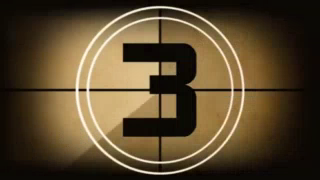

-1

In [14]:
import numpy as np
import cv2
from skimage import data, filters

from google.colab.patches import cv2_imshow

# Open Video
cap = cv2.VideoCapture('count.mp4')

# Randomly select 5 frames
frameIds = cap.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=5)

# Store selected frames in an array
frames = []
for fid in frameIds:
    cap.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = cap.read()
    frames.append(frame)

# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)    

# Display median frame
cv2_imshow(medianFrame)
cv2.waitKey(0)

## Background Subtraction

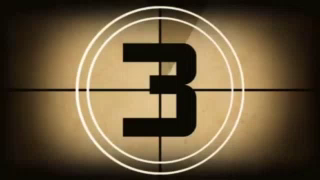

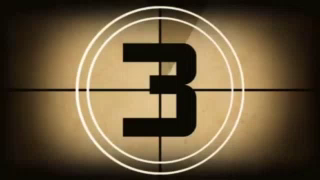

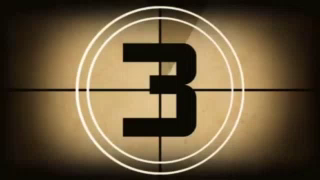

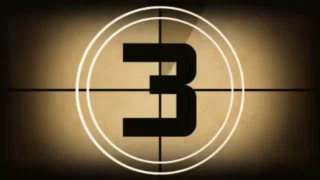

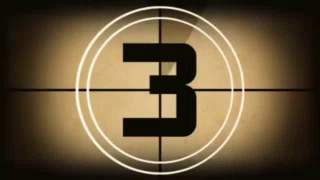

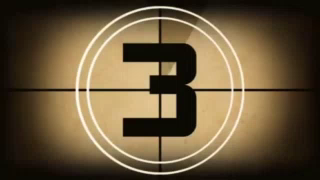

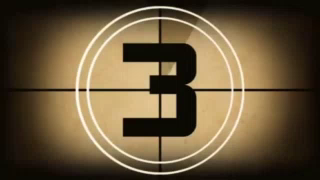

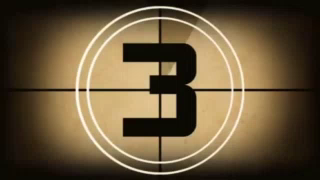

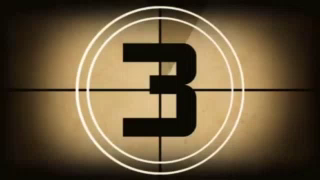

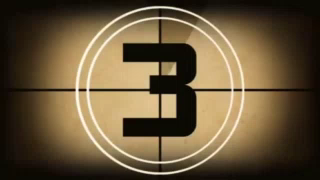

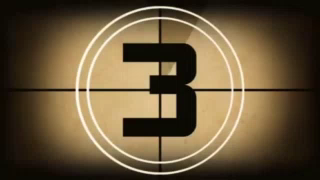

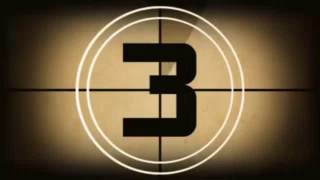

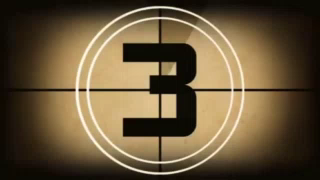

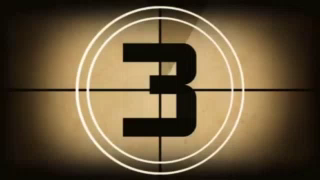

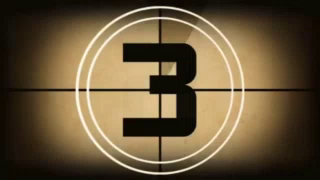

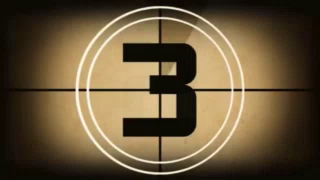

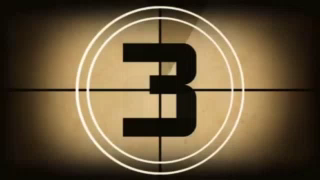

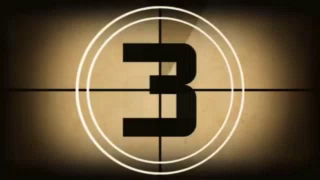

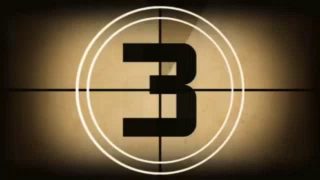

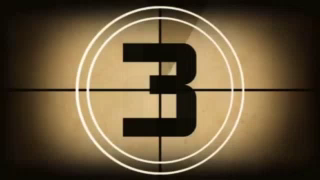

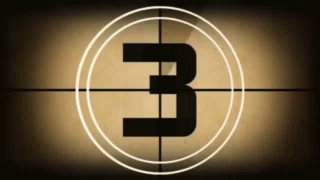

-1

In [21]:
file_path = 'count.mp4'

from google.colab.patches import cv2_imshow

cap = cv2.VideoCapture(file_path)
first_iter = True
result1 = None
while True:

  ret, frame = cap.read()
  if frame is None:
      break
  if first_iter:
     avg = np.float32(frame)
     first_iter = False
  cv2.accumulateWeighted(frame, avg, 0.005)
  result1 = cv2.convertScaleAbs(avg)
  cv2_imshow(result1)
cv2.waitKey(0)

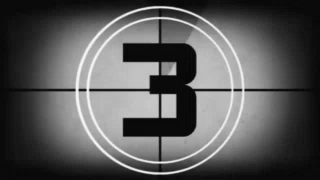

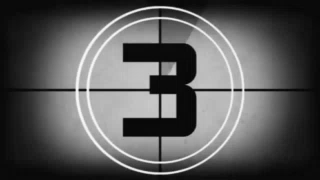

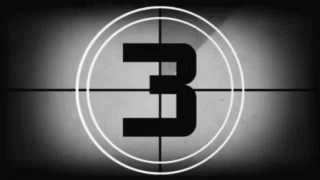

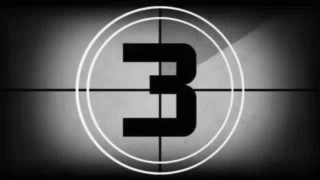

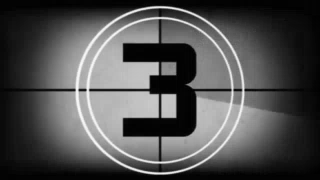

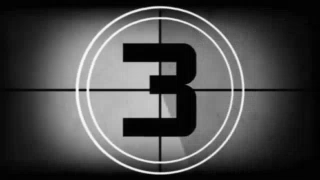

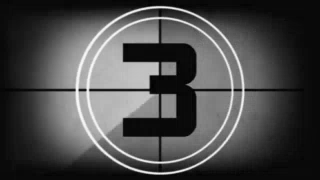

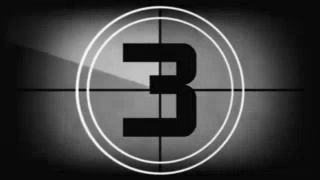

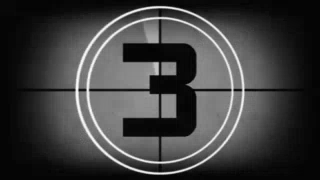

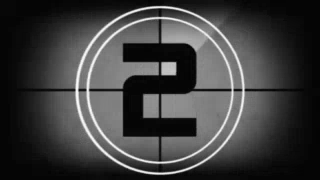

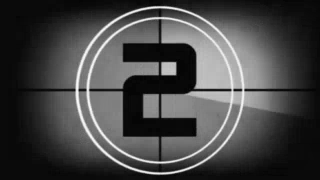

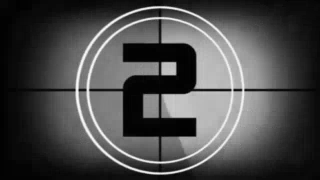

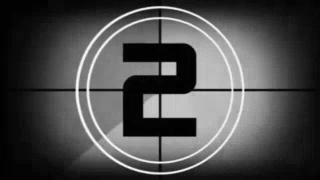

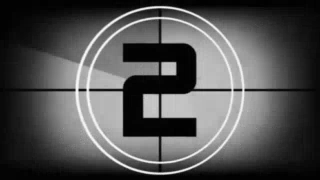

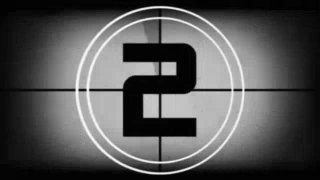

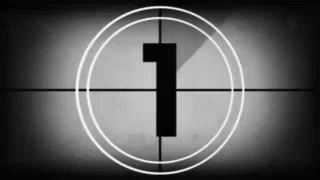

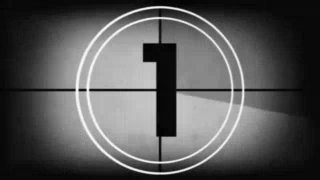

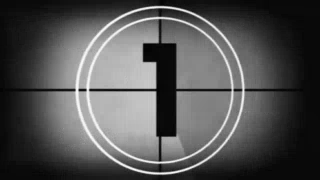

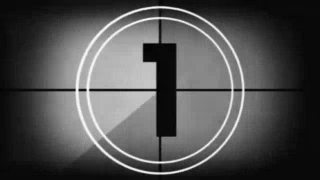

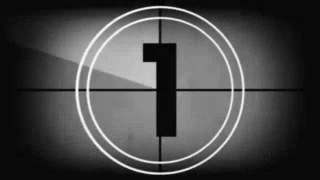

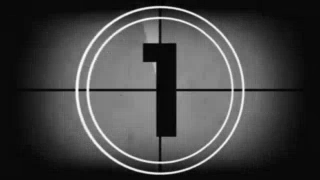

error: ignored

In [15]:
# importing the module
import cv2

from google.colab.patches import cv2_imshow


# reading the video
source = cv2.VideoCapture('count.mp4')

# running the loop
while True:
 
    # extracting the frames
    ret, img = source.read()
     
    # converting to gray-scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
    # displaying the video
    cv2_imshow(gray)
 
    # exiting the loop
    key = cv2.waitKey(1)
    if key == ord("q"):
        break
     
# closing the window
cv2.destroyAllWindows()
source.release()



In [17]:
 
# # running the loop
# while True:
 
#     # extracting the frames
#     ret, img = source.read()
     
#     # converting to gray-scale
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
#     # displaying the video
#     cv2_imshow(gray)
 
#     # exiting the loop
#     key = cv2.waitKey(1)
#     if key == ord("q"):
#         break
     
# # closing the window
# cv2.destroyAllWindows()
# source.release()